In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

In [2]:
with open("../comments/df_all_comments_parsed.pickle", "rb") as f:
    df_all = pickle.load(f)

In [3]:
len(df_all)

1843935

In [4]:
df_all[0:2].transpose()

reverting_timestamp_dt,2009-02-28 02:19:25,2009-02-10 23:03:37
archived,False,False
language,en,en
page_namespace,0,1
rev_deleted,False,False
rev_id,273691771,136526894
rev_minor_edit,False,False
rev_page,5040439,3046554
rev_parent_id,2.59117e+08,1.20932e+08
rev_revert_offset,1,1
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55


In [5]:
df_en_ns0 = df_all.query("page_namespace == 0 and language == 'en'")

## Group by

In [6]:
gb_page = df_en_ns0.groupby(["rev_page"])
gb_page_botpair = df_en_ns0.groupby(["rev_page", "botpair", "bottype"])
gb_botpair_page = df_en_ns0.groupby(["botpair", "bottype", "rev_page"])

## Number of bot-bot reverts by botpair for each page 

### Produce dataframe: {botpair, bottype, rev_page, count}

In [7]:
df_botpair_page = pd.DataFrame(gb_botpair_page['rev_id'].count())
df_botpair_page = df_botpair_page.rename(index=str, columns={'rev_id':'count'})
df_botpair_page[0:10]

count
botpair                   bottype                             rev_page       
.anacondabot rv Bota47    interwiki link cleanup -- suspected 49071         2
.anacondabot rv Chobot    interwiki link cleanup -- suspected 342902        2
.anacondabot rv D6        interwiki link cleanup -- suspected 6334208       2
.anacondabot rv Escarbot  interwiki link cleanup -- suspected 6440          2
                                                              266334        2
.anacondabot rv Palica    interwiki link cleanup -- suspected 57064         2
.anacondabot rv STBotD    interwiki link cleanup -- suspected 90226         2
.anacondabot rv Thijs!bot interwiki link cleanup -- suspected 48412         2
                                                              403685        2
                                                              2925761       2

### How many cases where one bot has reverted another bot more than 4 times on a single page?

In [8]:
len(df_botpair_page.query("count > 4"))

193

In [9]:
pd.set_option('display.max_rows', 500)

df_botpair_page.query("count > 5")

count
botpair                                            bottype                                         rev_page       
28bot rv AnomieBOT                                 other w/ revert in comment                      234906       16
Alexbot rv ChuispastonBot                          interwiki link cleanup -- suspected             2844938       6
AnomieBOT rv 28bot                                 other w/ revert in comment                      234906       14
AnomieBOT rv Cyberbot II                           botfight: Cyberbot II vs AnomieBOT date tagging 11260         6
                                                                                                   1121632      28
                                                                                                   5208697      26
                                                                                                   5469430      28
                                                                                                   8948190      28
                                                                                                   9568309      26
                                                                                                   15233039      6
                                                                                                   16752921     20
                                                                                                   22807757     28
                                                                                                   22881933     28
                                                                                                   30736081     26
                                                                                                   44436415     22
                                                   other w/ revert in comment                      5487         38
                                                                                                   4413025      34
                                                                                                   12795222     18
ArthurBot rv Mjbmrbot                              interwiki link cleanup -- suspected             160108       14
AvicBot rv Xqbot                                   fixing double redirect                          9987890       6
AvocatoBot rv AvicBot                              fixing double redirect                          3214580       6
                                                                                                   6462102       6
                                                                                                   6926979       6
                                                                                                   9735882       6
                                                                                                   10953125      6
                                                                                                   19065499      6
                                                                                                   20811478      6
                                                                                                   22529023      8
                                                                                                   24792926      6
AvocatoBot rv MSBOT                                interwiki link cleanup -- suspected             147101        6
BG19bot rv ListeriaBot                             other                                           49143051     28
Chobot rv Xqbot                                    interwiki link cleanup -- suspected             13121284      6
ChuispastonBot rv Luckas-bot                       interwiki link cleanup -- suspected             2008318       8
                                                                                    

## Counts
### Group by page_id only

In [10]:
print(gb_page['rev_id'].count().value_counts().sort_index())

1           2
2      199043
4       14635
6        2812
8         773
10        293
12        130
14         44
16         19
18         15
20         18
22          4
26          8
28          3
30          6
32          3
34          2
36          4
38          3
42          2
44          1
46          2
48          5
52          1
54          2
56          2
58          4
60          2
62          3
64          2
66          1
68          1
70          1
78          1
82          1
92          1
98          1
138         1
Name: rev_id, dtype: int64


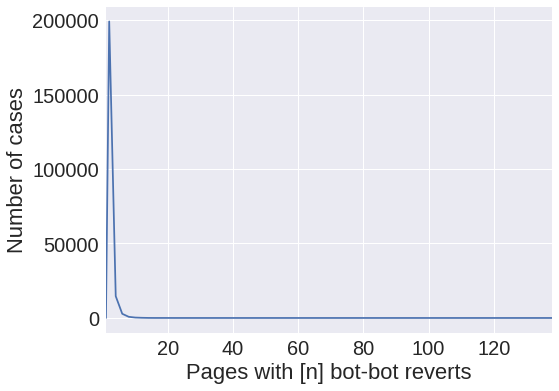

In [11]:
sns.set(font_scale=2)
ax = gb_page['rev_id'].count().value_counts().sort_index().plot(figsize=[8,6], logx=False, logy=False)

ax.set_ylabel("Number of cases")
ax.set_xlabel("Pages with [n] bot-bot reverts")

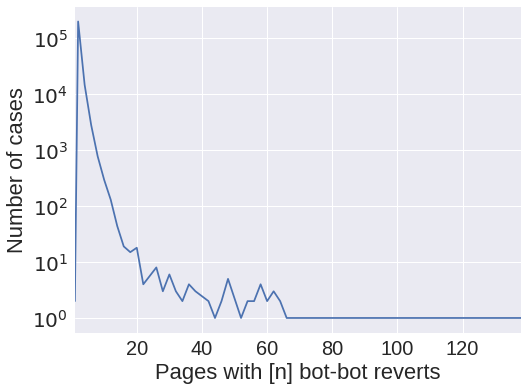

In [12]:
sns.set(font_scale=2)
ax = gb_page['rev_id'].count().value_counts().sort_index().plot(figsize=[8,6], logx=False, logy=True)

ax.set_ylabel("Number of cases")
ax.set_xlabel("Pages with [n] bot-bot reverts")